# Import modules

In [103]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Import scraped data using 3 API tokens and merge

In [104]:
# Import Data
data = pd.read_csv('Collected_data_raw.csv')
data2 = pd.read_csv('Collected_data_raw2.csv')
data3 = pd.read_csv('Collected_data_raw3.csv')
data = data.iloc[:, 1:]     # Remove extra un-named column
data2 = data2.iloc[:, 1:]     # Remove extra un-named column
data3 = data3.iloc[:, 1:]     # Remove extra un-named column
data.head()

,Video Id,Title,Description,Category
0,Qmi-Xwq-MEc,Traveling to the Happiest Country in the World!!,BLACK FRIDAY DROP Out Now*: http://seek-discom...,travel
1,aiTXpCepMwY,"TRAVELING TO COSTA RICA: vlog 1 (pack w me, fl...",hi guys!! this is like the first time i've vlo...,travel
2,sr284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,I spent 11 days cruising up the coast of Alask...,travel
3,USGN-aTzlG4,"TRAVEL DAY VLOG: Airport Essentials, What&#39;...",Follow along a travel day in my life!! LINKS: ...,travel
4,W4_Qyux4JRQ,28 TOP TRAVEL VLOGGER channels to follow!,My list of some of the BEST travel youtube cha...,travel


In [105]:
data.shape

(3745, 4)

In [106]:
data2.head()

,Video Id,Title,Description,Category
0,7lvXbfNBIQg,25 Most Beautiful Destinations in Europe - Tra...,Check out all the places seen in this video: h...,travel
1,NUDBwBJeKvY,25 Most Beautiful Destinations in America - Tr...,Check out all the places seen in this video: h...,travel
2,ypsQuQnoZLY,khai dreams - Travels ft. Atwood,Have a nice Day:) ○ Open Description ○ -------...,travel
3,4FPBeVTzKDE,Airbnb CEO Says There Will Be a New Golden Age...,Sep.21 -- Airbnb CEO Brian Chesky shares his t...,travel
4,r2jnBMtF2xU,Travels - Khai Dreams,NaN,travel


In [107]:
data2.shape

(3693, 4)

In [108]:
data3.head()

,Video Id,Title,Description,Category
0,AcI7gdTEIOE,MOST BEAUTIFUL TRAVEL DESTINATIONS AROUND THE ...,Today we share the most beautiful travel desti...,travel
1,huTUpPE9J4M,Oregon Coast Road Trip Vacation Travel Guide |...,The Oregon Coast – Discover dynamic shorelines...,travel
2,nl5d-m6oxcY,Travel Iceland - Amazing scenery and best plac...,Travel Iceland - amazing scenery and best plac...,travel
3,WwtRH6mgHks,Arches National Park Vacation Travel Guide | E...,Arches National Park – the natural rock format...,travel
4,m1ewbghHOP0,Lake Tahoe Vacation Travel Guide | Expedia,"Lake Tahoe – the USA's largest alpine lake, an...",travel


In [109]:
data3.shape

(3791, 4)

In [110]:
data_all = pd.concat([data, data2, data3], ignore_index=True)
data_all.shape

(11229, 4)

In [111]:
data_all.drop_duplicates(ignore_index= True)
data_all.shape

(11229, 4)

In [112]:
num_missing_desc = data_all.isnull().sum()[2]   
print('Number of missing values: ' + str(num_missing_desc))

Number of missing values: 687


In [115]:
data_all = data_all.dropna()

# Data Cleaning

We've dropped missing values, now we clean the data further:
1. Change to lowercase

2. Remove numbers

3. Remove Punctuation:  To avoid problems during tokenization

4. Remove blank spaces

5. Tokenization

6. Remove alphabetic tokens

7. Remove stopwords

8. Word Lemmentization ;Converts similar words to their base meaning


In [116]:
# Change to lowercase
data_all['Title'] = data_all['Title'].map(lambda x: x.lower())
data_all['Description'] = data_all['Description'].map(lambda x: x.lower())

# Remove numbers
data_all['Title'] = data_all['Title'].map(lambda x: re.sub(r'\d+', '', x))
data_all['Description'] = data_all['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
data_all['Title']  = data_all['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data_all['Description']  = data_all['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove blank spaces
data_all['Title'] = data_all['Title'].map(lambda x: x.strip())
data_all['Description'] = data_all['Description'].map(lambda x: x.strip())

# Tokenize into words
data_all['Title'] = data_all['Title'].map(lambda x: word_tokenize(x))
data_all['Description'] = data_all['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
data_all['Title'] = data_all['Title'].map(lambda x: [word for word in x if word.isalpha()])
data_all['Description'] = data_all['Description'].map(lambda x: [word for word in x if word.isalpha()])
# filter out stop words
stop_words = set(stopwords.words('english'))
data_all['Title'] = data_all['Title'].map(lambda x: [w for w in x if not w in stop_words])
data_all['Description'] = data_all['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
data_all['Title'] = data_all['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
data_all['Description'] = data_all['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
data_all['Title'] = data_all['Title'].map(lambda x: ' '.join(x))
data_all['Description'] = data_all['Description'].map(lambda x: ' '.join(x))

In [117]:
data_all

,Video Id,Title,Description,Category
0,Qmi-Xwq-MEc,travel happiest country world,black friday drop httpseekdiscomfortcomyestheo...,travel
1,aiTXpCepMwY,travel costa rica vlog pack w fly first days,hi guy like first time ive vlogged family trip...,travel
2,sr284c-q8oY,solo trip alaska cruise vancouver anchorage,spend days cruise coast alaska magical blog post,travel
3,USGN-aTzlG4,travel day vlog airport essentials whats bag a...,follow along travel day life link luggage wwwa...,travel
4,W4_Qyux4JRQ,top travel vlogger channel follow,list best travel youtube channel currently tra...,travel
...,...,...,...,...
11224,Iq9hF2BArhY,level upgrade mattresses,level john show us level rv melt ice cream fre...,DIY
11225,PcmsZRciu3Y,life hack easy life hack simple life hack tikt...,lifehack easylifehacks simplelifehacks tiktokl...,DIY
11226,Vn9kdrvsKPY,anyone help explain shortstools,short trendingsoapcubes asmrsoapcarving soapca...,DIY
11227,62MqVN8xvFU,know shortsmachine,short trendingsoapcubes asmrsoapcarving soapca...,DIY


## Label Encoding

We can't feed our text data to ML models.
We need to convert them into numerical based features

In [118]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_all.Category)
data_all.Category = le.transform(data_all.Category)
data_all.head(5)

,Video Id,Title,Description,Category
0,Qmi-Xwq-MEc,travel happiest country world,black friday drop httpseekdiscomfortcomyestheo...,6
1,aiTXpCepMwY,travel costa rica vlog pack w fly first days,hi guy like first time ive vlogged family trip...,6
2,sr284c-q8oY,solo trip alaska cruise vancouver anchorage,spend days cruise coast alaska magical blog post,6
3,USGN-aTzlG4,travel day vlog airport essentials whats bag a...,follow along travel day life link luggage wwwa...,6
4,W4_Qyux4JRQ,top travel vlogger channel follow,list best travel youtube channel currently tra...,6


## Plot Label distribution

To check data is balanced

<AxesSubplot:title={'center':'Number of samples for each class'}>

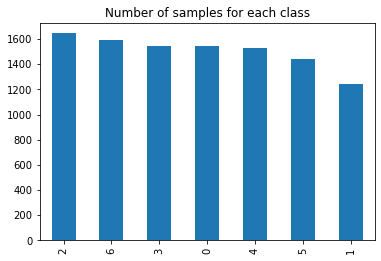

In [120]:
data_all['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')

## TF-IDF feature extraction

Check if the features extracted using TF-IDF vectorization makes sense

: find the most correlated unigrams and bigrams for each class using both the Titles and the Description.

In [119]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data_all.Category
features_title = tfidf_title.fit_transform(data_all.Title).toarray()
features_description = tfidf_desc.fit_transform(data_all.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (10542, 3936)
Description Features Shape: (10542, 5586)


In [121]:
# Best 5 keywords for each class using Title Feaures
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Beauty':
Most correlated unigrams:
------------------------------
. secrets
. tip
. makeup
. ready
. beauty
Most correlated bigrams:
------------------------------
. skin care
. beauty ready
. secrets vogue
. beauty secrets
. beauty tip


# 'Comedy':
Most correlated unigrams:
------------------------------
. episode
. microfilm
. კომედი
. skit
. comedy
Most correlated bigrams:
------------------------------
. stand comedy
. unique microfilm
. funny video
. comedy video
. comedy skit


# 'DIY':
Most correlated unigrams:
------------------------------
. make
. decor
. craft
. ideas
. diy
Most correlated bigrams:
------------------------------
. diy craft
. decor ideas
. hack diy
. easy diy
. diy ideas


# 'fashion':
Most correlated unigrams:
------------------------------
. trend
. best
. style
. items
. fashion
Most correlated bigrams:
------------------------------
. fashion week
. fashion channel
. best fashion
. fashion trend
. fashion items


# 'food':
Most correlated unigrams:
-

In [122]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Beauty':
Most correlated unigrams:
------------------------------
. routine
. tip
. ready
. makeup
. beauty
Most correlated bigrams:
------------------------------
. skin care
. makeup look
. beauty secrets
. beauty routine
. beauty tip


# 'Comedy':
Most correlated unigrams:
------------------------------
. comedyskit
. microfilm
. funny
. skit
. comedy
Most correlated bigrams:
------------------------------
. comedy video
. unique microfilm
. funny videos
. comedy videos
. comedy skit


# 'DIY':
Most correlated unigrams:
------------------------------
. project
. easy
. make
. ideas
. diy
Most correlated bigrams:
------------------------------
. life hack
. diy project
. easy diy
. make diy
. diy ideas


# 'fashion':
Most correlated unigrams:
------------------------------
. dress
. outfit
. style
. items
. fashion
Most correlated bigrams:
------------------------------
. channel visit
. visit subscribe
. subscribe fashion
. fashion channel
. fashion items


# 'food':
Most correla

# Model and Train

### 4 Models to analyse: 
Naive Bayes Classifier

Support Vector Machine

Adaboost Classifier

LSTM

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(data_all.iloc[:, 1:3], data_all['Category'], random_state = 3)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [124]:
X_train.head()

,Title,Description
5343,beauty tip makeup hack look classy,look elegant classy use make create effect tip...
5330,rosalías guide pink eyeshadow slickedback pony...,rosalía reveal beauty secrets prettyinpink mak...
861,ay comedy skit funke akindele quotgovernors da...,need watch inborn humorous abilities ay popula...
9990,lokesh gamers live stream free fire funny vide...,freefire freefirevideo freefiretiktokffshortfr...
4434,კომედი რა სად როდის,მოიწონეთ გააზიარეთ და გამოიწერეთ კომედი ჯგუფის...


In [125]:
y_train.head()

5343    0
5330    0
861     1
9990    5
4434    1
Name: Category, dtype: int64

In [126]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

# LSTM

Separate pre-processing for LSTM. 

1. Combine Title and Description for each sample into a single sentence
2. Tokenize the combined sentence into padded sequences: Each sentence is converted into a list of tokens, each token is assigned a numerical id and then each sequence is made the same length by padding shorter sequences, and truncating longer sequences.
3. One-Hot Encoding the ‘Category’ variable

In [127]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = data_all['Title'].values
descriptions = data_all['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(data_all['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 24)

Found 24028 unique tokens.
Shape of data tensor: (10542, 50)
Shape of label tensor: (10542, 7)


In [128]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 7)                 707       
                                                                 
Total params: 2,081,107
Trainable params: 2,081,107
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(np.array(X_train), np.array(Y_train), epochs=epochs, batch_size= batch_size, validation_split=0.1)

Epoch 1/5
112/112 [==============================] - 21s 147ms/step - loss: 1.1908 - accuracy: 0.6066 - val_loss: 0.3192 - val_accuracy: 0.9267
Epoch 2/5
112/112 [==============================] - 15s 135ms/step - loss: 0.1863 - accuracy: 0.9536 - val_loss: 0.1535 - val_accuracy: 0.9621
Epoch 3/5
112/112 [==============================] - 15s 135ms/step - loss: 0.0813 - accuracy: 0.9830 - val_loss: 0.1488 - val_accuracy: 0.9633
Epoch 4/5
112/112 [==============================] - 16s 147ms/step - loss: 0.0555 - accuracy: 0.9889 - val_loss: 0.1525 - val_accuracy: 0.9684
Epoch 5/5
112/112 [==============================] - 17s 149ms/step - loss: 0.0410 - accuracy: 0.9903 - val_loss: 0.1519 - val_accuracy: 0.9621


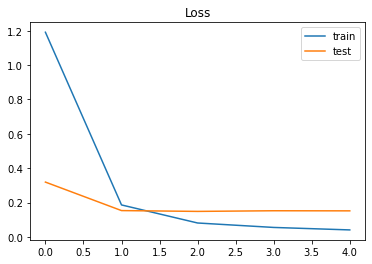

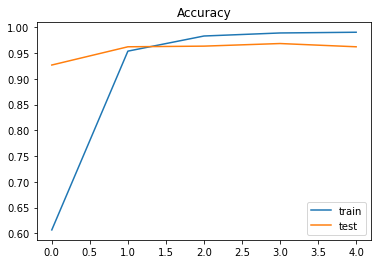

In [130]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data_all.iloc[:, 1:3], data_all['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

              precision    recall  f1-score   support

      Beauty       0.98      0.96      0.97       383
      Comedy       0.97      0.97      0.97       290
         DIY       0.93      0.97      0.95       402
     fashion       0.95      0.94      0.95       383
        food       0.97      0.97      0.97       406
      gaming       0.97      0.93      0.95       367
      travel       0.97      0.98      0.97       405

    accuracy                           0.96      2636
   macro avg       0.96      0.96      0.96      2636
weighted avg       0.96      0.96      0.96      2636



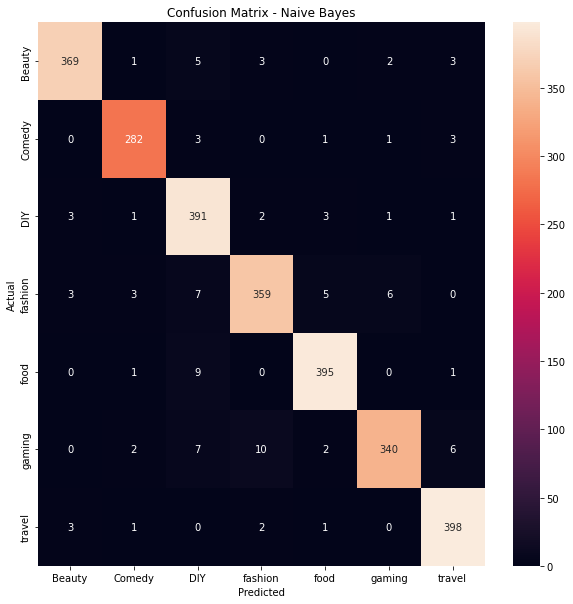

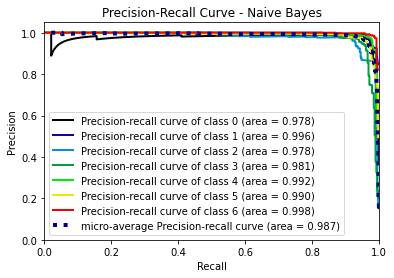

In [134]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

              precision    recall  f1-score   support

      Beauty       0.99      0.99      0.99       383
      Comedy       0.98      0.99      0.99       290
         DIY       0.96      0.99      0.98       402
     fashion       0.98      0.97      0.98       383
        food       0.99      0.98      0.98       406
      gaming       0.98      0.98      0.98       367
      travel       1.00      0.99      0.99       405

    accuracy                           0.98      2636
   macro avg       0.98      0.98      0.98      2636
weighted avg       0.98      0.98      0.98      2636



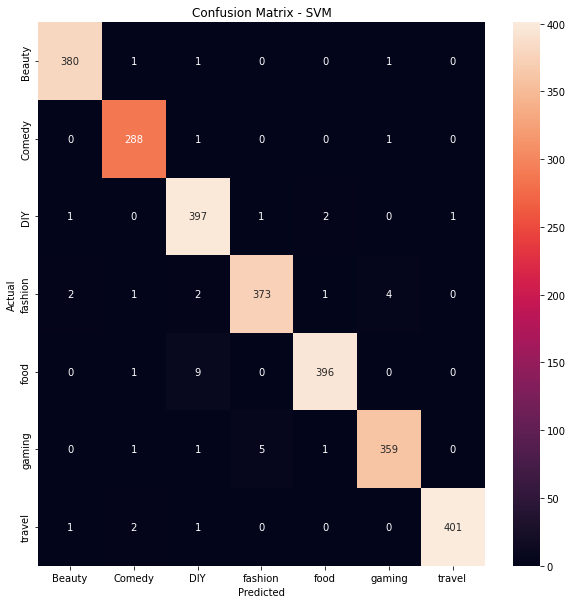

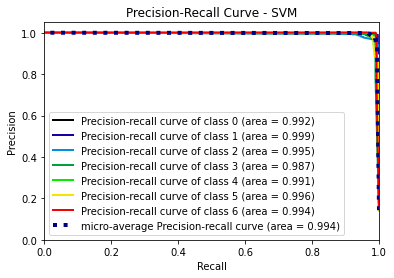

In [135]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()

              precision    recall  f1-score   support

      Beauty       0.99      0.88      0.93       383
      Comedy       0.99      0.80      0.89       290
         DIY       0.97      0.88      0.92       402
     fashion       1.00      0.81      0.89       383
        food       0.99      0.83      0.90       406
      gaming       0.53      0.99      0.69       367
      travel       0.99      0.88      0.93       405

    accuracy                           0.87      2636
   macro avg       0.92      0.87      0.88      2636
weighted avg       0.92      0.87      0.88      2636



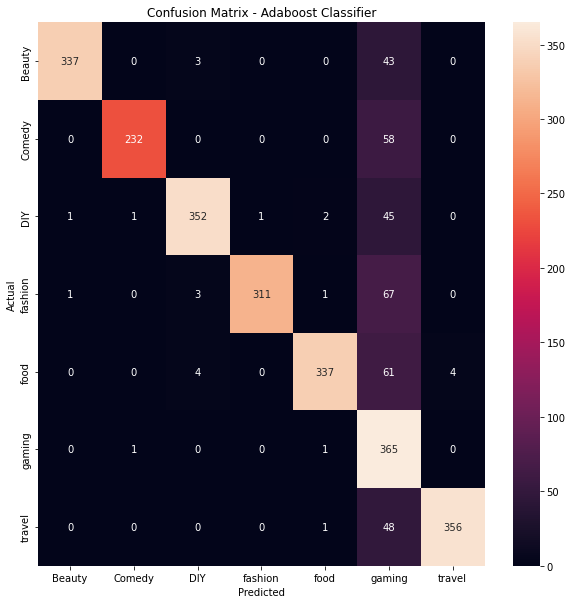

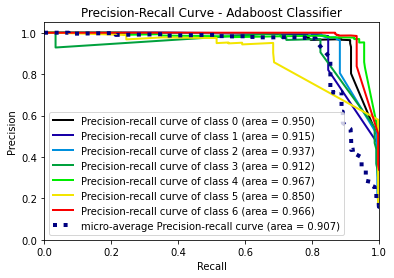

In [136]:
# Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.show()

              precision    recall  f1-score   support

      Beauty       0.99      0.98      0.99       382
      Comedy       0.97      0.98      0.98       336
         DIY       0.97      0.98      0.98       389
     fashion       0.98      0.96      0.97       370
        food       1.00      0.99      0.99       382
      gaming       0.98      0.98      0.98       359
      travel       0.98      1.00      0.99       418

    accuracy                           0.98      2636
   macro avg       0.98      0.98      0.98      2636
weighted avg       0.98      0.98      0.98      2636



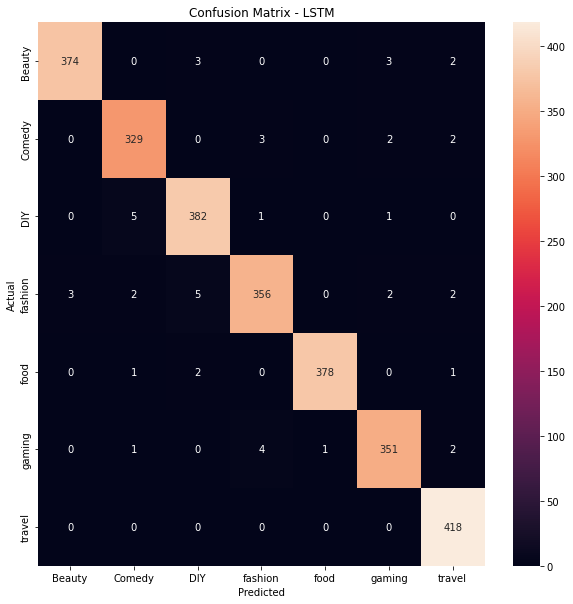

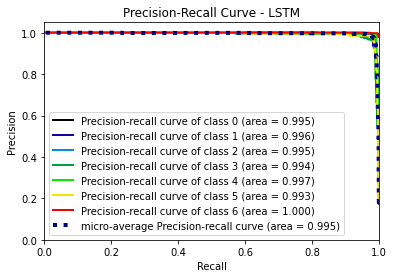

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()


# Result :
### LSTM > SVM > Naive Bayes > AdaBoost